# Names of the most frequent Genes/Pathways
###### N-> even if the other plots are idps-idps, retina-idps. For these type of plots just one: idpsretina-idpsretina

In [1]:
import os, sys
import logging

os.chdir('..')
current_dir = os.getcwd()

from settings import PYTHON_LOGGING_LEVEL, DIR_UTILS, FILE_GENETIC_INFO, DATE_USED, N_NAMES_SHOWN

logger = logging.getLogger(__name__)
logging.basicConfig(level=PYTHON_LOGGING_LEVEL)

DIR_UTILS = os.getenv('DIR_UTILS')
sys.path.append(DIR_UTILS)
N_NAMES_SHOWN = int(N_NAMES_SHOWN)

from utils.preprocessing_genet.previous_sumstats import (get_genetic_names, combine_genes_path_names_idps_ret,
                                                        df_gen_path_names_processing, plot_scatter_pascal_names,
                                                        pascal_scatter_names)

from utils.data_information.data_genetics_info import list_names
from utils.data_information.data_retina_info import list_retina_homologous_red, list_retina_homologous_red_new


In [2]:
## pheno_info_file is a csv to filter the relevant IDPs
pheno_info_file = f'{DIR_UTILS}utils/data_information/{FILE_GENETIC_INFO}'
traits_all, traits_all_new = get_genetic_names(pheno_info_file)

all_names = traits_all + list_retina_homologous_red
all_names_new = traits_all_new + list_retina_homologous_red_new

2024-07-23 14:08:59,776 - INFO - Size of df1: (1576, 4). Size of df2: (891, 4)
2024-07-23 14:08:59,779 - INFO - Size of combined_df is (2467, 4)
2024-07-23 14:09:09,969 - INFO - Size of df1: (246, 6). Size of df2: (118, 6)
2024-07-23 14:09:09,972 - INFO - Size of combined_df is (364, 6)


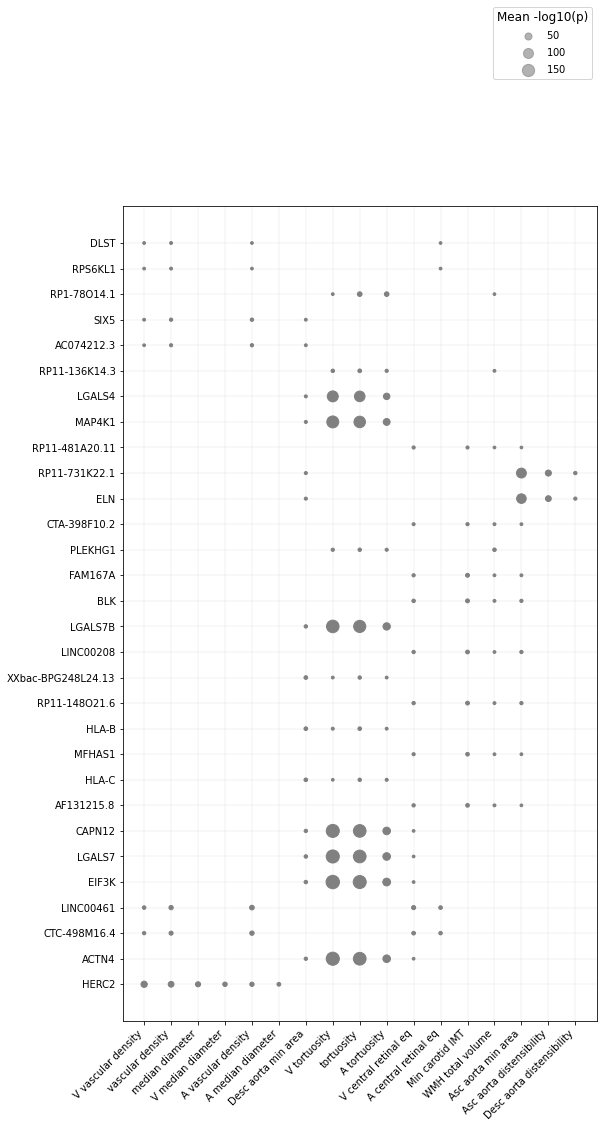

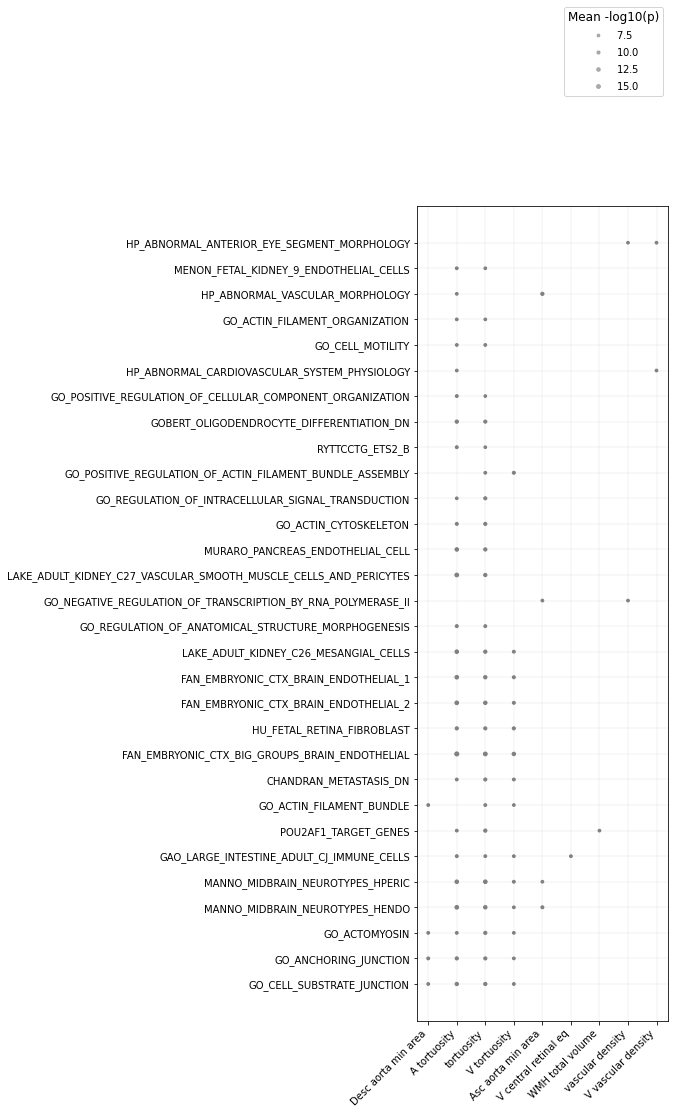

In [3]:
list_both = ['gen', 'pathway']
#gen_path = 'gen' #'gen' or 'pathway'
for gen_path in list_both:
    # other idps
    df_significant_idp, df_count_idp, df_guardar_final_idp, df_save_shapes_idp, df_save_intersections_idp, filenames_idp = pascal_scatter_names(gen_path)
    # retina
    df_significant_ret, df_count_ret, df_guardar_final_ret, df_save_shapes_ret, df_save_intersections_ret, filenames_ret = pascal_scatter_names(gen_path, list_retina_homologous_red)
    # combine
    df_significant = combine_genes_path_names_idps_ret(df_significant_idp, df_significant_ret)
    # proper format
    df_reduc = df_gen_path_names_processing(all_names,all_names_new, df_significant, N_NAMES_SHOWN, gen_path)
    # PLOT
    name_fig = f'{DATE_USED}_name_freq_{gen_path}.jpg'
    plot_scatter_pascal_names(df_reduc, gen_path, name_fig)
